In [307]:
import pandas as pd
import numpy as np
import geopandas as gdf
import matplotlib.pyplot as plt
import os
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [308]:
world=gdf.read_file(gdf.datasets.get_path('naturalearth_lowres'))
world.head()

data=world[world['continent']=="Europe"]

In [309]:
data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.143 79.674, 15.523 80.016, ..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.027 58.856, 11.468 59.432, 12.300..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.177 56.169, 29.230 55.918, 29.372..."


In [310]:
countries=data['name'].unique()

In [311]:
info_path = os.path.join(os.path.dirname(os.getcwd()),"COVID-19/csse_covid_19_data/csse_covid_19_daily_reports")

In [312]:
all_files = []
for csv_file in os.listdir(info_path):
    if not csv_file.strip().endswith(".csv"): continue
    all_files.append(csv_file)
    
all_files = sorted(all_files)
for csv_file in all_files:
    if not csv_file.strip().endswith(".csv"): continue
    full_path = os.path.join(info_path, csv_file)
    df = pd.read_csv(full_path)

In [313]:
df['Last_Update']=pd.to_datetime(df['Last_Update'])
df.sort_values(by=['Last_Update'],ascending=False).head()
eu_df=df[df['Combined_Key'].isin(countries)]
eu_df=eu_df.loc[:,['Confirmed','Deaths','Recovered','Country_Region']]


merged=eu_df.merge(contour, right_on='name',left_on='Country_Region')
merged.head()

,Confirmed,Deaths,Recovered,Country_Region,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,584,26,327,Albania,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
1,14795,470,10631,Austria,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
2,6264,51,514,Belarus,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
3,39983,5828,8895,Belgium,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ..."
4,929,43,167,Bulgaria,7101510,Europe,Bulgaria,BGR,143100.0,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."


In [314]:
merged['iso_a3'].iloc[10]='FRA'
merged['iso_a3'].iloc[17]='UNK'
merged['iso_a3'].iloc[24]='NOR'

In [362]:
def plot(cases,title):
    fig = px.choropleth(merged, locations="iso_a3",
                        scope="europe",
                        color=cases,
                        hover_name="name",
                        color_continuous_scale=px.colors.sequential.Plasma)
    #fig.update_layout(width=900,margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_layout(width=1000, height=700,
                        title_text=title,
                        title_x=0.5,
                        font_family='BalO',
                        coloraxis=dict(colorscale='Portland',
                                       showscale=False),
                        mapbox = dict(center= dict(lat=5.499998,lon=17.3833318),
                        zoom=2.55),
                        margin={"r":0,"t":0,"l":0,"b":0}                
                        )
    fig.show()

In [364]:
cases="Confirmed"
title='Europe - March 21, 2020 Confirmed COVID-19 cases'
plot(cases,title)

In [365]:
cases="Deaths"
title='Europe - March 21, 2020 <br>Deaths COVID-19 cases'
plot(cases,title)

In [366]:
cases="Recovered"
title='Europe - March 21, 2020 <br>Confirmed COVID-19 cases'
plot(cases,title)

### GEOPANDAS | BELOW UNDER CONSTRUCTION

In [286]:
data.crs="EPSG:2176"

### Focus map on continental Europe

* Make the map smaller by exluding countries at the edge of the projection
* Remove **Rusia|Norway|Belarus|Ukraine**

In [287]:
'''
countries=data['name'].unique().tolist()
for idx in [0,1,4,5]:
    del countries[idx]
'''

"\ncountries=data['name'].unique().tolist()\nfor idx in [0,1,4,5]:\n    del countries[idx]\n"

### Map contour

In [288]:
contour=data[data['name'].isin(countries)]

In [289]:
contour.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.143 79.674, 15.523 80.016, ..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.027 58.856, 11.468 59.432, 12.300..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.177 56.169, 29.230 55.918, 29.372..."


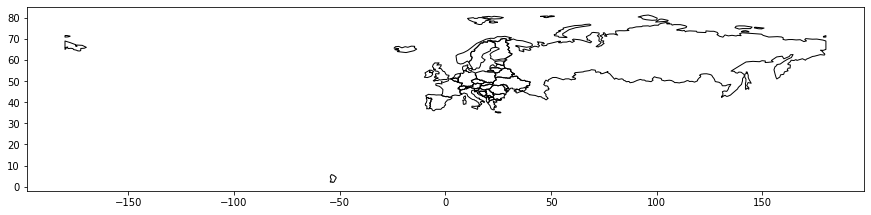

In [290]:
contour.plot(figsize=(15,15), color='none', edgecolor='black', zorder=3)